<a href="https://colab.research.google.com/github/soniNiharika/EDA-project/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Lets take a look at the data, which consist of two file

*   Play store data.csv
*   user_review



1. lets import the libraries required.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

2. create a dataframe ('df_Play_Store') for storing data of Play store.csv file
and
a dataframe (df_User_Reviews) for storing data of 
User_Reviews.csv file

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path where the data is kept

path="/content/drive/MyDrive/Copy of Play Store Data.csv"

In [4]:
# creating a dataframe for play store data.csv

df_Play_Store_duplicate_data = pd.read_csv(path)

In [5]:
# Define the path where the data us user review.csv kept

path="/content/drive/MyDrive/Copy of User Reviews.csv"

In [6]:
# creating a dataframe for user reviews.csv

df_User_Reviews = pd.read_csv(path)

In [7]:
# lets read the dataset df_Play_Store

df_Play_Store_duplicate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Play store data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

In [8]:
# lets read the dataset df_Play_Store

df_User_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## * User_reviews.csv: contains 64295 entries. There are three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.





# **2. Data cleaning**



**What is data cleaning?**

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

# **Step 1: Remove duplicate or irrelevant observations**
Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. Duplicate observations will happen most often during data collection. When you combine data sets from multiple places, scrape data, or receive data from clients or multiple departments, there are opportunities to create duplicate data. De-duplication is one of the largest areas to be considered in this process. Irrelevant observations are when you notice observations that do not fit into the specific problem you are trying to analyze. For example, if you want to analyze data regarding millennial customers, but your dataset includes older generations, you might remove those irrelevant observations. This can make analysis more efficient and minimize distraction from your primary target—as well as creating a more manageable and more performant dataset.



In [9]:
# Checking the duplicate rows 
duplicate_rows =df_Play_Store_duplicate_data[df_Play_Store_duplicate_data.duplicated()].count()
print(f'There are total Duplicate rows \n {duplicate_rows} ')


There are total Duplicate rows 
 App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64 


In [10]:
# Lets drop the duplicate rows
df_Play_Store= df_Play_Store_duplicate_data[~df_Play_Store_duplicate_data.duplicated()] 

In [11]:
# read the data of play store data after the removing duplicate data
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Step 2: Filter unwanted outliers**
Often, there will be one-off observations where, at a glance, they do not appear to fit within the data you are analyzing. If you have a legitimate reason to remove an outlier, like improper data-entry, doing so will help the performance of the data you are working with. However, sometimes it is the appearance of an outlier that will prove a theory you are working on. Remember: just because an outlier exists, doesn’t mean it is incorrect. This step is needed to determine the validity of that number. If an outlier proves to be irrelevant for analysis or is a mistake, consider removing it.

In [12]:
# lets check the data 
df_Play_Store.describe()


,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


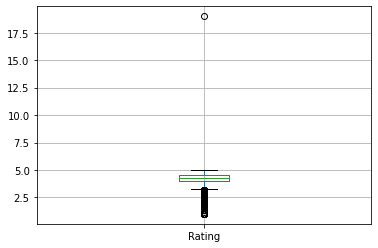

In [13]:
# lets plot the boxplot graph
df_Play_Store.boxplot()

As we can notice that ratings going till 17.5
Whereas the maximum rating is 5.

So there is an outlier.


So, lets check the rows which have rating more than 5

In [14]:
# checking rating more that 5

df_Play_Store[df_Play_Store['Rating']>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# lets drop this outlier 
df_Play_Store.drop([10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
# Checking the droped row is present or not
df_Play_Store.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


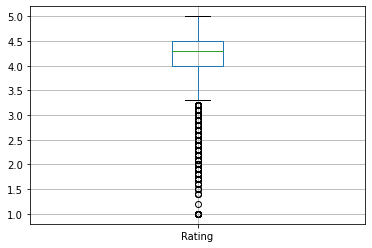

In [17]:
#lets check plot the graph again
df_Play_Store.boxplot()

Now we have the proper graph

# **Step 3: Handle missing data**
You can’t ignore missing data because many algorithms will not accept missing values. There are a couple of ways to deal with missing data. Neither is optimal, but both can be considered.

As a first option, you can drop observations that have missing values, but doing this will drop or lose information, so be mindful of this before you remove it.
As a second option, you can input missing values based on other observations; again, there is an opportunity to lose integrity of the data because you may be operating from assumptions and not actual observations.
As a third option, you might alter the way the data is used to effectively navigate null values.

**Removing the columns that are 90% empty**

In [18]:
#  Calculating the thereshold of our dataframe
threshold = len(df_Play_Store) * 0.1
threshold

1035.7

In [19]:
# drop those columns that are 90% empty
df_Play_Store.dropna(thresh = threshold,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# lets check for null values 
df_Play_Store.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here "**Rating**","**Content rating**","**Current ver**", "**Android Ver**" are the columns that have null values



So, we replace the numerical null values by MEAN and ctaegorical values by MODE

1.Fill the null values of Rating column

In [21]:
# Lets make a function that will fill the null value with there median

def fill_median(series):
  return series.fillna(series.mean())

In [22]:
# call the function to fill value

df_Play_Store.Rating = df_Play_Store['Rating'].transform(fill_median)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
# converting "Rating" column into float
df_Play_Store['Raing'] = df_Play_Store['Rating'].apply(lambda x: float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Raing           10357 non-null  float64
dtypes: float64(2), object(12)
memory usage: 1.5+ MB


2. Lets fill the categorical value with mode

Now we will make a function that will fill the mode value in the categorical columns 

In [25]:
# Functon for filling the categorical values

def fill_mode(series):
  return series.fillna(series.mode)

In [26]:
# df_Play_Store.Type = df_Play_Store['Type'].transform(fill_mode)

In [27]:
columns_to_fill = ['Type','Current Ver','Android Ver']
for col in columns_to_fill:
  df_Play_Store[col] = df_Play_Store[col].transform(fill_mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df_Play_Store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Raing             0
dtype: int64

# **Step 2: Fix structural errors**
Structural errors are when you measure or transfer data and notice strange naming conventions, typos, or incorrect capitalization. These inconsistencies can cause mislabeled categories or classes. For example, you may find “N/A” and “Not Applicable” both appear, but they should be analyzed as the same category.

The 'Installs' column in 'play Store Data' is numerical type but it also contains [, and +] sign because of which it is of string type.

So, firstly we have to convert this into numerical type.

In [29]:
# check the columns that need cleaning
df_Play_Store.head(50)
                  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Raing
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.100000
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.900000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.700000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.500000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.300000
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.400000
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.800000
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,4.100000
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,4.400000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,4.700000


In [30]:
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
 13  Raing           10357 non-null  float64
dtypes: float64(2), object(12)
memory usage: 1.5+ MB


In [31]:
df_Play_Store['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

The "Price" column also have a "$" sign which converts it into a string datatype.


The 'Installs' and 'Price' columns in 'play Store Data' is numerical type but it also contains [, and +,$] signs
because of which it is of string type.Let's clean by removing these and converting each column to a numeric type.

So, firstly we have to convert this into numerical type.

In [32]:
# make a list of characters that needed to be removed
char_to_remove = [',','$','+',]
# make a listof columns that needed to be cleaned
columns_to_clean = ['Price','Installs']

# Loop for each column
for col in columns_to_clean:
    # Replace the characters in each column col with an empty string
    for char in char_to_remove:
        df_Play_Store[col] = df_Play_Store[col].str.replace(char, '')

        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [33]:
# lets convert the columns "Price" and "Installs" to numeric
df_Play_Store['Price'] = df_Play_Store['Price'].apply(lambda x: float(x))
df_Play_Store['Installs'] = df_Play_Store['Installs'].apply(lambda x: int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df_Play_Store['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int64

In [35]:
df_Play_Store[df_Play_Store['Price']>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Raing
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,4.700000
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,4.800000
427,Puffin Browser Pro,COMMUNICATION,4.000000,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,4.000000
476,"Moco+ - Chat, Meet People",DATING,4.200000,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,4.200000
477,Calculator,DATING,2.600000,57,6.2M,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.187877,17,157k,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,4.187877
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.400000,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,4.400000
10782,Trine 2: Complete Story,GAME,3.800000,252,11M,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,3.800000
10785,"sugar, sugar",FAMILY,4.200000,1405,9.5M,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,4.200000


# **Step 5: Validate and QA**
At the end of the data cleaning process, you should be able to answer these questions as a part of basic validation:

Does the data make sense?

Does the data follow the appropriate rules for its field?

Does it prove or disprove your working theory, or bring any insight to light?

Can you find trends in the data to help you form your next theory?

If not, is that because of a data quality issue?

False conclusions because of incorrect or “dirty” data can inform poor business strategy and decision-making. False conclusions can lead to an embarrassing moment in a reporting meeting when you realize your data doesn’t stand up to scrutiny. Before you get there, it is important to create a culture of quality data in your organization. To do this, you should document the tools you might use to create this culture and what data quality means to you.

The "Size" column contains an extra letter 'M' and "k" after the numerical value, which need to be corrected.

Since here M stands for MB and K stands for KB.
since, they are not equal. So, just removing the "M" and "k" will not help.
Firstly, we have to convert the KB into MB size .





In [36]:
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: float(str(x).replace('k',''))*0.001 if 'k' in str(x) else str(x))
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: float(str(x).replace('M','')) if 'M' in str(x) else str(x) )
# df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: float(str(x).replace('Varies with device','0')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: str(x).replace('Varies with device','0'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Since in "Size" column we have converted the size
value "Varies with device  " to 0.
We should give some value to it.
We can fill 0 with Mean.

In [39]:
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: df_Play_Store['Size'].mean() if x==0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_Play_Store['Size'] = df_Play_Store['Size'].apply(lambda x: float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_Play_Store.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
 13  Raing           10357 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.5+ MB


## **Data Visualization**

# Exploratory Analysis and Visualization
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent the property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

Lets check the distribution apps categories


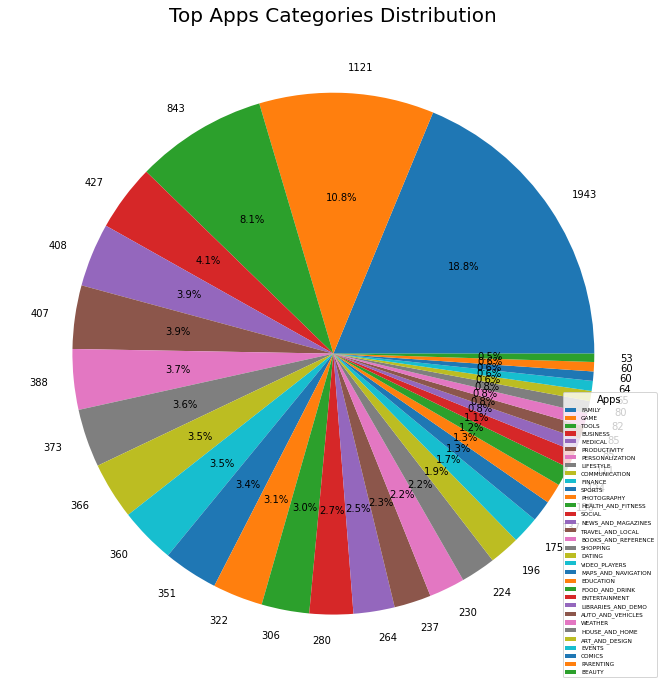

In [53]:
plt.figure(figsize=(15,12));
plt.pie(df_Play_Store['Category'].value_counts(), explode=None, labels=df_Play_Store['Category'].value_counts(), autopct='%1.1f%%', startangle=0);
plt.title(' Apps Categories Distribution',size = 20);
plt.legend(df_Play_Store['Category'].value_counts().index, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# **Count of apps in each category**

In [56]:
y = df_Play_Store['Category'].value_counts()
x = df_Play_Store['Category'].value_counts().index
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

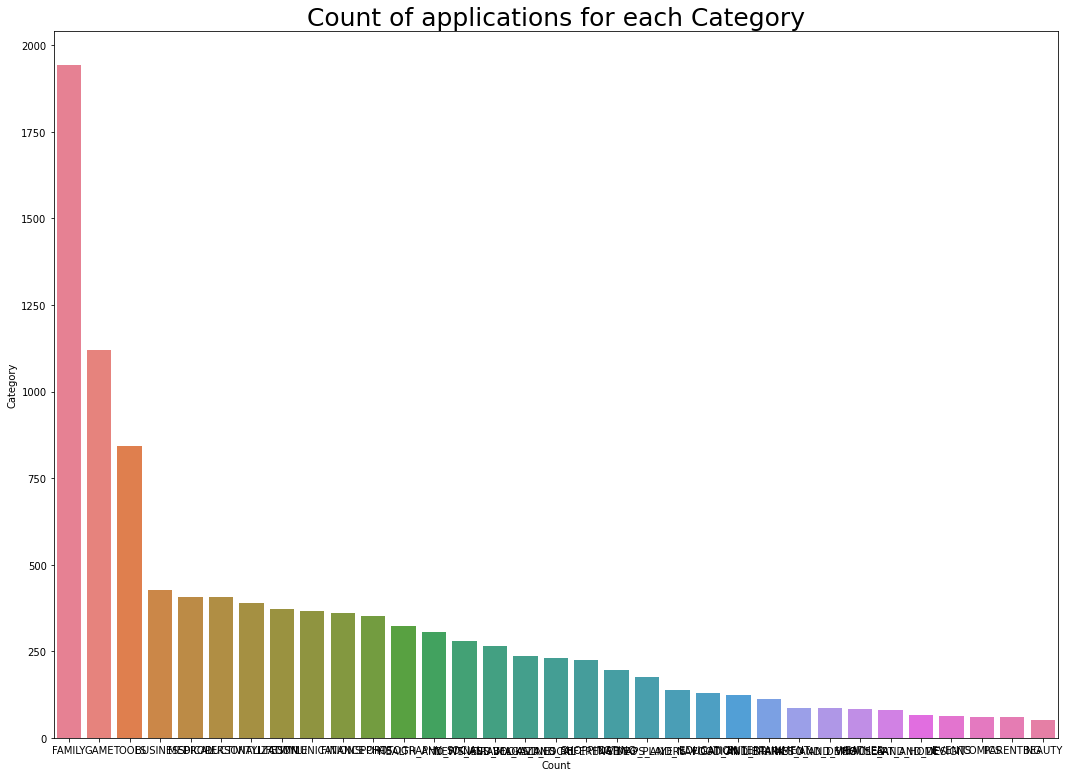

In [65]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Count of applications for each Category", fontsize = 25);

**Number of installed application for each category**

> Which category App’s have the most number of installs?



In [67]:
# top_category = df_Play_Store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
Category_df = df_Play_Store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [68]:
category_installs =df_Play_Store.groupby(['Category'])[['Installs']].sum()

In [69]:
# top_category_installs = pd.merge(Category_df, category_installs, on='Category')
Category_installs_df = pd.merge(Category_df, category_installs, on='Category')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


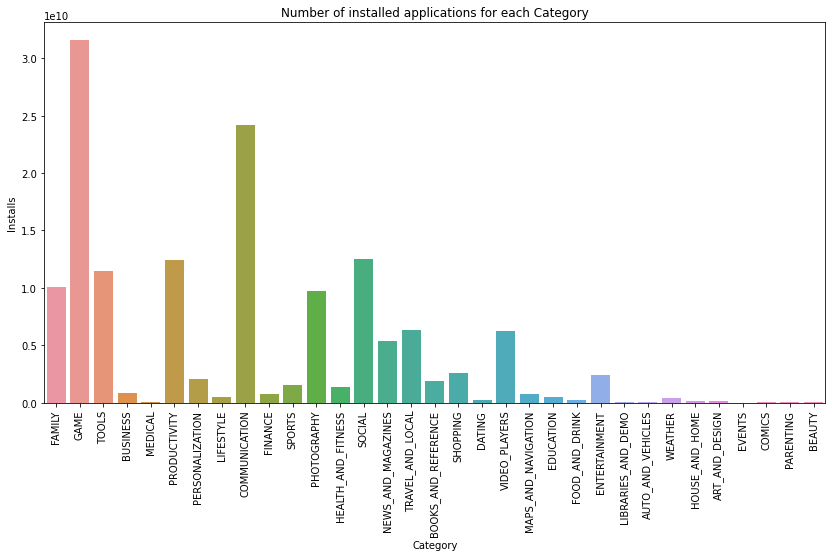

In [70]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(Category_installs_df.Category, Category_installs_df.Installs)
plt.show()

From the above two plots we can conclude that, maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installations and requirements in the market place, this is not the case. Maximum installed apps comes under Games, Communication and Tools.

Lets dig deep in the category features
and see what is the relationship of categories with different features



1.   What are the count of applications in each category differentiated by their type?




In [85]:
app_count = df_Play_Store.groupby(['Category','Type'])['App'].value_counts()
# .reset_index().rename(columns={'App':'Count','index':'App'})

TypeError: ignored

In [81]:
app_count

# **to be countinued ....**